# {ML vs My Mom - Housing Model}📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

The problem being addressed is the difficulty in accurately predicting home prices in the real estate markets. Homebuyers, sellers, and real estate professionals can benefit from a reliable and accurate model that provides an estimation of home prices based on historical sales and relevant attributes.

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

Can a machine learning model predict home prices more accurately than a human with good real estate knowledge (my mom) of the area (Loveland, OH)?

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

The hypothesized answer is that the machine learning model, when trained on a comprehensive dataset of historical sales and relevant attributes, can provide more accurate predictions of home prices than a knowledgeable human, due to its ability to consider a larger number of variables and identify complex patterns in the data.

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

I will be scrapping Zillow

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

1. Data Collection: Gather a comprehensive dataset of historical home sales in Loveland, OH, including property attributes (e.g., square footage, number of bedrooms, number of bathrooms, location, and other relevant factors).

2. Data Preprocessing: Clean and preprocess the data, handling missing values, outliers, and encoding categorical variables as needed.

3. Feature Engineering: Identify and create new features that may have predictive power, based on domain knowledge and exploratory data analysis.

4. Model Selection: Test various machine learning algorithms (e.g., linear regression, decision trees, support vector machines, and neural networks) and select the one that provides the best performance, based on evaluation metrics like Mean Absolute Error (MAE) and R-squared.

5. Model Training: Train the selected model on the preprocessed dataset, tuning hyperparameters as needed to optimize performance.

6. Model Evaluation: Evaluate the model's performance on a test dataset not used during training.

7. Interpretation and Validation: Analyze the results, interpret the model's predictions, and validate the model's accuracy by comparing it with the human's predictions on a new set of properties not used during training. If the model demonstrates superior performance, the hypothesis will be supported.

# Data Collection
I'm scrapping Zillow to get all the houses sold in the Loveland, OH area in the past year (4/7/2022 - 4/7/2023)

In [11]:
import json
import time
import pandas as pd
import http.client

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns


mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use("bmh")
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

Making a request to Zillow to get the houses with the following fields that I've identified as meaningful

In [2]:
statusType = []
soldPrice = []
unformattedPrice = []
address = []
addressStreet = []
addressCity = []
addressState = []
addressZipcode = []
beds = []
baths = []
area = []
isZillowOwned = []
variableData = []
hdpData = []
latitude = []
longitude = []
price = []
dateSold = []
homeType = []
homeStatus = []
zestimate = []
rentZestimate = []
priceForHDP = []
currency = []
country = []
taxAssessedValue = []
lotAreaValue = []
lotAreaUnit = []
brokerName = []

def getResponse(page):
  url = f"https://www.zillow.com/search/GetSearchPageState.htm?searchQueryState=%7B%22pagination%22%3A%7B%22currentPage%22%3A{page}%7D%2C%22usersSearchTerm%22%3A%22Loveland%2C%20OH%22%2C%22mapBounds%22%3A%7B%22west%22%3A-84.37974306982422%2C%22east%22%3A-84.10302493017578%2C%22south%22%3A39.152149232712055%2C%22north%22%3A39.36534736841241%7D%2C%22mapZoom%22%3A12%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A5710%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22doz%22%3A%7B%22value%22%3A%2212m%22%7D%2C%22isCondo%22%3A%7B%22value%22%3Afalse%7D%2C%22isForSaleForeclosure%22%3A%7B%22value%22%3Afalse%7D%2C%22isApartment%22%3A%7B%22value%22%3Afalse%7D%2C%22isMultiFamily%22%3A%7B%22value%22%3Afalse%7D%2C%22isAllHomes%22%3A%7B%22value%22%3Atrue%7D%2C%22sortSelection%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%2C%22isAuction%22%3A%7B%22value%22%3Afalse%7D%2C%22isNewConstruction%22%3A%7B%22value%22%3Afalse%7D%2C%22isRecentlySold%22%3A%7B%22value%22%3Atrue%7D%2C%22isLotLand%22%3A%7B%22value%22%3Afalse%7D%2C%22isTownhouse%22%3A%7B%22value%22%3Afalse%7D%2C%22isMiddleSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22isHighSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22includeUnratedSchools%22%3A%7B%22value%22%3Afalse%7D%2C%22isManufactured%22%3A%7B%22value%22%3Afalse%7D%2C%22isForSaleByOwner%22%3A%7B%22value%22%3Afalse%7D%2C%22isComingSoon%22%3A%7B%22value%22%3Afalse%7D%2C%22isPublicSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22isPrivateSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22isApartmentOrCondo%22%3A%7B%22value%22%3Afalse%7D%2C%22isElementarySchool%22%3A%7B%22value%22%3Afalse%7D%2C%22isForSaleByAgent%22%3A%7B%22value%22%3Afalse%7D%2C%22isCharterSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22greatSchoolsRating%22%3A%7B%22min%22%3A%221%22%7D%7D%2C%22isListVisible%22%3Atrue%7D&wants={{%22cat1%22:[%22listResults%22]}}&requestId=2"

  conn = http.client.HTTPSConnection("www.zillow.com")

  payload={}
  headers = {
    'Cookie': 'x-amz-continuous-deployment-state=AYABeHEN0tqCsWupmgl3%2F5ovG78APgACAAFEAB1kM2Jsa2Q0azB3azlvai5jbG91ZGZyb250Lm5ldAABRwAVRzAxMTE2MjczQzlQQzdZU1JDTVBHAAEAAkNEABpDb29raWUAAACAAAAADG%2F52OaQfNIJt5gr7wAwa8ksg4xl78oKkXFQzgMai7yix49fWvQdzMBOStxRZ0nNBNdkcp0yAUNlFIZtgepnAgAAAAAMAAQAAAAAAAAAAAAAAAAAALGapE1G2GC1faDJGo+NNaX%2F%2F%2F%2F%2FAAAAAQAAAAAAAAAAAAAAAQAAAAxE9IK0h9G6jGBvr5xywc2FYfQD9+myuKPFg1MgQD9+myuKPFg1Mg==; search=6|1682459771554%7Crect%3D39.36534736841241%252C-84.10302493017578%252C39.152149232712055%252C-84.37974306982422%26rid%3D5710%26disp%3Dmap%26mdm%3Dauto%26p%3D1%26z%3D1%26listPriceActive%3D1%26days%3D12m%26type%3Dhouse%26fs%3D0%26fr%3D0%26mmm%3D0%26rs%3D1%26ah%3D0%26singlestory%3D0%26housing-connector%3D0%26abo%3D0%26garage%3D0%26pool%3D0%26ac%3D0%26waterfront%3D0%26finished%3D0%26unfinished%3D0%26cityview%3D0%26mountainview%3D0%26parkview%3D0%26waterview%3D0%26hoadata%3D1%26zillow-owned%3D0%263dhome%3D0%26featuredMultiFamilyBuilding%3D0%26commuteMode%3Ddriving%26commuteTimeOfDay%3Dnow%09%09%09%09%09%09%09%09; zgsession=1|e42fe483-86c7-4941-a44a-035f9ad782e7; zguid=24|%2423d0665d-1a19-4c83-95e5-30ab8f8ec133; AWSALB=7o8QDvkzOEBfwgmsA8eFXbIz1xIWMhxgOu0raIK0MDqHFCnifRfm9ictKJBlnRbacFusneyZJ4AduduIXRQEGjgvn1b/8WcE9Sa3zUAmkNpWqTSZPidQJZyNEvnz; AWSALBCORS=7o8QDvkzOEBfwgmsA8eFXbIz1xIWMhxgOu0raIK0MDqHFCnifRfm9ictKJBlnRbacFusneyZJ4AduduIXRQEGjgvn1b/8WcE9Sa3zUAmkNpWqTSZPidQJZyNEvnz; JSESSIONID=B27F9E1F606458A6EEBC079ECEA1DFB6'
  }

  conn.request("GET", url, payload, headers)
  res = conn.getresponse()
  data = res.read()
  data = data.decode("utf-8")
  json_obj = json.loads(data)
  return json_obj

def getData(json_obj):
  data = [x for x in json_obj["cat1"]["searchResults"]['listResults']]
      
  for d in data:
    statusType.append(d['statusType'] if 'statusType' in d else None)
    soldPrice.append(d['soldPrice'] if 'soldPrice' in d else None)
    unformattedPrice.append(d['unformattedPrice'] if 'unformattedPrice' in d else None)
    address.append(d['address'] if 'address' in d else None)
    addressStreet.append(d['addressStreet'] if 'addressStreet' in d else None)
    addressCity.append(d['addressCity'] if 'addressCity' in d else None)
    addressState.append(d['addressState'] if 'addressState' in d else None)
    addressZipcode.append(d['addressZipcode'] if 'addressZipcode' in d else None)
    beds.append(d['beds'] if 'beds' in d else None)
    baths.append(d['baths'] if 'baths' in d else None)
    area.append(d['area'] if 'area' in d else None)
    isZillowOwned.append(d['isZillowOwned'] if 'isZillowOwned' in d else None)
    variableData.append(d['variableData'] if 'variableData' in d else None)
    hdpData.append(d['hdpData'] if 'hdpData' in d else None)
    latitude.append(d['hdpData']['homeInfo']['latitude'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'latitude' in d['hdpData']['homeInfo'] else None)
    longitude.append(d['hdpData']['homeInfo']['longitude'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'longitude' in d['hdpData']['homeInfo'] else None)
    price.append(d['hdpData']['homeInfo']['price'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'price' in d['hdpData']['homeInfo'] else None)
    dateSold.append(d['hdpData']['homeInfo']['dateSold'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'dateSold' in d['hdpData']['homeInfo'] else None)
    homeType.append(d['hdpData']['homeInfo']['homeType'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'homeType' in d['hdpData']['homeInfo'] else None)
    homeStatus.append(d['hdpData']['homeInfo']['homeStatus'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'homeStatus' in d['hdpData']['homeInfo'] else None)
    zestimate.append(d['hdpData']['homeInfo']['zestimate'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'zestimate' in d['hdpData']['homeInfo'] else None)
    rentZestimate.append(d['hdpData']['homeInfo']['rentZestimate'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'rentZestimate' in d['hdpData']['homeInfo'] else None)  
    priceForHDP.append(d['hdpData']['homeInfo']['priceForHDP'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'priceForHDP' in d['hdpData']['homeInfo'] else None)
    currency.append(d['hdpData']['homeInfo']['currency'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'currency' in d['hdpData']['homeInfo'] else None)
    country.append(d['hdpData']['homeInfo']['country'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'country' in d['hdpData']['homeInfo'] else None)
    taxAssessedValue.append(d['hdpData']['homeInfo']['taxAssessedValue'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'taxAssessedValue' in d['hdpData']['homeInfo'] else None)
    lotAreaValue.append(d['hdpData']['homeInfo']['lotAreaValue'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'lotAreaValue' in d['hdpData']['homeInfo'] else None)
    lotAreaUnit.append(d['hdpData']['homeInfo']['lotAreaUnit'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'lotAreaUnit' in d['hdpData']['homeInfo'] else None)
    brokerName.append(d['brokerName'] if 'brokerName' in d else None)

Run initially to get the total pages of data in the response

In [3]:
url = f"https://www.zillow.com/search/GetSearchPageState.htm?searchQueryState=%7B%22pagination%22%3A%7B%22currentPage%22%3A1%7D%2C%22usersSearchTerm%22%3A%22Loveland%2C%20OH%22%2C%22mapBounds%22%3A%7B%22west%22%3A-84.37974306982422%2C%22east%22%3A-84.10302493017578%2C%22south%22%3A39.152149232712055%2C%22north%22%3A39.36534736841241%7D%2C%22mapZoom%22%3A12%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A5710%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22doz%22%3A%7B%22value%22%3A%2212m%22%7D%2C%22isCondo%22%3A%7B%22value%22%3Afalse%7D%2C%22isForSaleForeclosure%22%3A%7B%22value%22%3Afalse%7D%2C%22isApartment%22%3A%7B%22value%22%3Afalse%7D%2C%22isMultiFamily%22%3A%7B%22value%22%3Afalse%7D%2C%22isAllHomes%22%3A%7B%22value%22%3Atrue%7D%2C%22sortSelection%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%2C%22isAuction%22%3A%7B%22value%22%3Afalse%7D%2C%22isNewConstruction%22%3A%7B%22value%22%3Afalse%7D%2C%22isRecentlySold%22%3A%7B%22value%22%3Atrue%7D%2C%22isLotLand%22%3A%7B%22value%22%3Afalse%7D%2C%22isTownhouse%22%3A%7B%22value%22%3Afalse%7D%2C%22isMiddleSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22isHighSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22includeUnratedSchools%22%3A%7B%22value%22%3Afalse%7D%2C%22isManufactured%22%3A%7B%22value%22%3Afalse%7D%2C%22isForSaleByOwner%22%3A%7B%22value%22%3Afalse%7D%2C%22isComingSoon%22%3A%7B%22value%22%3Afalse%7D%2C%22isPublicSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22isPrivateSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22isApartmentOrCondo%22%3A%7B%22value%22%3Afalse%7D%2C%22isElementarySchool%22%3A%7B%22value%22%3Afalse%7D%2C%22isForSaleByAgent%22%3A%7B%22value%22%3Afalse%7D%2C%22isCharterSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22greatSchoolsRating%22%3A%7B%22min%22%3A%221%22%7D%7D%2C%22isListVisible%22%3Atrue%7D&wants={{%22cat1%22:[%22listResults%22]}}&requestId=2"

conn = http.client.HTTPSConnection("www.zillow.com")

payload={}
headers = {
'Cookie': 'x-amz-continuous-deployment-state=AYABeHEN0tqCsWupmgl3%2F5ovG78APgACAAFEAB1kM2Jsa2Q0azB3azlvai5jbG91ZGZyb250Lm5ldAABRwAVRzAxMTE2MjczQzlQQzdZU1JDTVBHAAEAAkNEABpDb29raWUAAACAAAAADG%2F52OaQfNIJt5gr7wAwa8ksg4xl78oKkXFQzgMai7yix49fWvQdzMBOStxRZ0nNBNdkcp0yAUNlFIZtgepnAgAAAAAMAAQAAAAAAAAAAAAAAAAAALGapE1G2GC1faDJGo+NNaX%2F%2F%2F%2F%2FAAAAAQAAAAAAAAAAAAAAAQAAAAxE9IK0h9G6jGBvr5xywc2FYfQD9+myuKPFg1MgQD9+myuKPFg1Mg==; search=6|1682459771554%7Crect%3D39.36534736841241%252C-84.10302493017578%252C39.152149232712055%252C-84.37974306982422%26rid%3D5710%26disp%3Dmap%26mdm%3Dauto%26p%3D1%26z%3D1%26listPriceActive%3D1%26days%3D12m%26type%3Dhouse%26fs%3D0%26fr%3D0%26mmm%3D0%26rs%3D1%26ah%3D0%26singlestory%3D0%26housing-connector%3D0%26abo%3D0%26garage%3D0%26pool%3D0%26ac%3D0%26waterfront%3D0%26finished%3D0%26unfinished%3D0%26cityview%3D0%26mountainview%3D0%26parkview%3D0%26waterview%3D0%26hoadata%3D1%26zillow-owned%3D0%263dhome%3D0%26featuredMultiFamilyBuilding%3D0%26commuteMode%3Ddriving%26commuteTimeOfDay%3Dnow%09%09%09%09%09%09%09%09; zgsession=1|e42fe483-86c7-4941-a44a-035f9ad782e7; zguid=24|%2423d0665d-1a19-4c83-95e5-30ab8f8ec133; AWSALB=7o8QDvkzOEBfwgmsA8eFXbIz1xIWMhxgOu0raIK0MDqHFCnifRfm9ictKJBlnRbacFusneyZJ4AduduIXRQEGjgvn1b/8WcE9Sa3zUAmkNpWqTSZPidQJZyNEvnz; AWSALBCORS=7o8QDvkzOEBfwgmsA8eFXbIz1xIWMhxgOu0raIK0MDqHFCnifRfm9ictKJBlnRbacFusneyZJ4AduduIXRQEGjgvn1b/8WcE9Sa3zUAmkNpWqTSZPidQJZyNEvnz; JSESSIONID=B27F9E1F606458A6EEBC079ECEA1DFB6'
}

conn.request("GET", url, payload, headers)
res = conn.getresponse()
data = res.read()
data = data.decode("utf-8")
json_obj = json.loads(data)

total_pages = json_obj.get('cat1', dict()).get('searchList', dict()).get('totalPages')

print(total_pages)

20


Zillow does not like scraping, so we need to sleep for a while between requests

In [4]:
for page in range(1, total_pages+1):
    json_obj = getResponse(page)
    getData(json_obj)
    time.sleep(100)

Let's put our scraped data into a csv for future use

In [5]:
holder = (list(zip(statusType,soldPrice,unformattedPrice,address,addressStreet,addressCity,addressState,addressZipcode,beds,baths,area,isZillowOwned,variableData,hdpData,latitude,longitude,price,dateSold,homeType,homeStatus,zestimate,rentZestimate,priceForHDP,currency,country,taxAssessedValue,lotAreaValue,lotAreaUnit,brokerName)))
columns = ['statusType', 'soldPrice', 'unformattedPrice', 'address', 'addressStreet', 'addressCity', 'addressState', 'addressZipcode', 'beds', 'baths', 'area', 'isZillowOwned', 'variableData', 'hdpData', 'latitude', 'longitude', 'price', 'dateSold', 'homeType', 'homeStatus', 'zestimate', 'rentZestimate', 'priceForHDP', 'currency', 'country', 'taxAssessedValue', 'lotAreaValue', 'lotAreaUnit', 'brokerName']
houses = pd.DataFrame(holder, columns=columns)
houses.to_csv('houses.csv', index=False)

# Data Preprocessing

In [40]:
houses = pd.read_csv('houses.csv')
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   statusType        800 non-null    object 
 1   soldPrice         800 non-null    object 
 2   unformattedPrice  800 non-null    int64  
 3   address           800 non-null    object 
 4   addressStreet     800 non-null    object 
 5   addressCity       800 non-null    object 
 6   addressState      800 non-null    object 
 7   addressZipcode    800 non-null    int64  
 8   beds              722 non-null    float64
 9   baths             722 non-null    float64
 10  area              697 non-null    float64
 11  isZillowOwned     800 non-null    bool   
 12  variableData      800 non-null    object 
 13  hdpData           800 non-null    object 
 14  latitude          786 non-null    float64
 15  longitude         786 non-null    float64
 16  price             800 non-null    float64
 1

Dropping some unuseful columns

In [41]:
houses.drop(['statusType', 'soldPrice', 'address', 'addressStreet', 'addressCity', 'addressState', 'addressZipcode', 'isZillowOwned', 'variableData', 'hdpData', 'price', 'homeType', 'homeStatus', 'priceForHDP', 'currency', 'country', 'brokerName'], axis=1, inplace=True)
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   unformattedPrice  800 non-null    int64  
 1   beds              722 non-null    float64
 2   baths             722 non-null    float64
 3   area              697 non-null    float64
 4   latitude          786 non-null    float64
 5   longitude         786 non-null    float64
 6   dateSold          800 non-null    int64  
 7   zestimate         658 non-null    float64
 8   rentZestimate     765 non-null    float64
 9   taxAssessedValue  766 non-null    float64
 10  lotAreaValue      790 non-null    float64
 11  lotAreaUnit       790 non-null    object 
dtypes: float64(9), int64(2), object(1)
memory usage: 75.1+ KB


Changing column names to make more sense

In [42]:
houses.rename(columns={'unformattedPrice': 'price', 'area': 'sqft'}, inplace=True)
houses.head()

,price,beds,baths,sqft,latitude,longitude,dateSold,zestimate,rentZestimate,taxAssessedValue,lotAreaValue,lotAreaUnit
0,300000,3.0000,2.0000,1269.0000,39.2993,-84.2749,1680850800000,275300.0000,1700.0000,183140.0000,8550.8280,sqft
1,218000,3.0000,1.0000,925.0000,39.2690,-84.2750,1680764400000,211000.0000,1749.0000,93270.0000,8059.0000,acres
2,535000,4.0000,4.0000,2914.0000,39.2212,-84.2327,1680678000000,546400.0000,3033.0000,293300.0000,0.6900,acres
3,850000,4.0000,5.0000,5101.0000,39.2359,-84.2500,1680505200000,NaN,3999.0000,NaN,0.5620,acres
4,660300,3.0000,2.0000,1880.0000,39.2891,-84.2443,1680159600000,660700.0000,2194.0000,336410.0000,4.2378,acres


Some of the area values are in sqft and some are in acres, let's convert all of them to acres

In [43]:
def convert_to_acres(row):
    if row['lotAreaUnit'] == 'sqft':
        return row['lotAreaValue'] / 43560
    else:
        return row['lotAreaValue']

houses['lotAreaValue'] = houses.apply(convert_to_acres, axis=1)

houses.drop(['lotAreaUnit'], axis=1, inplace=True)

The price is what we're focused on, so let's take a further look at it

In [44]:
houses['price'].describe()

count         800.0000
mean       612692.0375
std       5664873.9264
min          1000.0000
25%        219500.0000
50%        335000.0000
75%        510875.0000
max     160000000.0000
Name: price, dtype: float64

Wow, a house sold for $160 million and one sold for only $1,000! Something isn't right, I did some digging and it looks like Zillow had some wrong data for some "houses". I checked the $160 million dollar house on the audtior site and it should be $160,000. For th houses on the lower end, I found that either the data was wrong or the houses were complete trash (fixer-uppers if you will). To negate these issues, I've decided to filter my dataset from the price of $100,000 to $10,000,000.

$160 million dollar house - https://www.zillow.com/homedetails/6091-2nd-St-Miamiville-OH-45147/2062599063_zpid/

In [45]:
houses = houses[(houses['price'] > 100000) & (houses['price'] < 10000000)]
houses['price'].describe()

count       746.0000
mean     424602.4531
std      365453.5235
min      100440.0000
25%      237500.0000
50%      350500.0000
75%      524750.0000
max     5300000.0000
Name: price, dtype: float64

This looks a little better, we might revisit this down the road

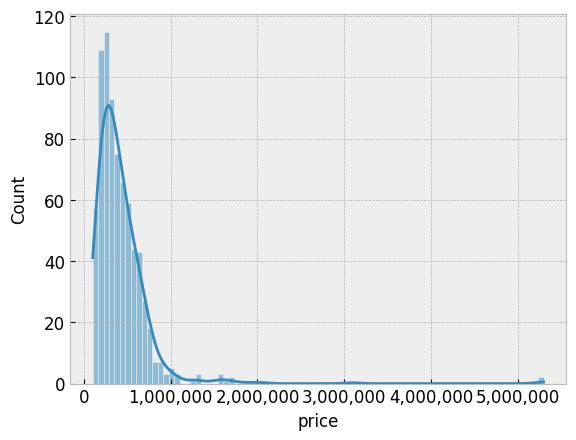

In [46]:
ax = sns.histplot(houses['price'], kde=True)
ax.xaxis.set_major_formatter(plt.FuncFormatter('{:,.0f}'.format))
plt.show()

Let's make sure there are no duplicates

In [48]:
houses.duplicated().sum()

1

# Feature Engineering

# Model Selection

# Model Training

# Model Evaluation

# Interpretation and Validation

In [27]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook LovelandHousing.ipynb to python
[NbConvertApp] Writing 17379 bytes to LovelandHousing.py
